<a href="https://colab.research.google.com/github/Swatisdpt/Machine_Learning_Coursework/blob/main/KMeansClusteringElbow_B0191344.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# K Means Clustering Algorithm - Elbow Method
In this example, we will apply [K means clustering algorithm](https://en.wikipedia.org/wiki/K-means_clustering) to a random dataset.

We will make use of the elbow method to find the number of clusters for the given dataset.

# Set the root directory for processing.

In [ ]:
import os

root_dir = '/content/'
os.chdir(root_dir)

!ls -al

total 16
drwxr-xr-x 1 root root 4096 Apr 11 13:21 .
drwxr-xr-x 1 root root 4096 Apr 13 06:25 ..
drwxr-xr-x 4 root root 4096 Apr 11 13:21 .config
drwxr-xr-x 1 root root 4096 Apr 11 13:21 sample_data


# Import required python modules.

In [ ]:
import numpy as np
np.random.seed(7)

In [ ]:
from sklearn import datasets

In [ ]:
from matplotlib import pyplot
%matplotlib inline

In [ ]:
from sklearn.cluster import KMeans

# Define helper functions for processing datasets.

In [ ]:
def random_dataset_two(number_of_samples=2500):

  number_of_features=2
  centers = [(-5, -5), (5, -5), (0, 0), (-5, 5), (5, 5)]
  random_state = 7

  X, y = datasets.make_blobs(n_samples=number_of_samples, n_features=number_of_features, centers=centers, random_state=random_state)

  return(X, y, number_of_samples)

In [ ]:
def show_dataset(points_dataset, cluster_centers=None):
  pyplot.scatter(points_dataset[:, 0], points_dataset[:, 1], c='black', s=7)
  if(cluster_centers is not None):
    pyplot.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='g')

In [ ]:
def show_clustered_dataset(points_dataset, cluster_ids, cluster_centers, number_of_clusters):
  colors = ['r', 'g', 'b', 'y', 'c', 'm']
  figure, axes = pyplot.subplots()
  for i in range(number_of_clusters):
        points = np.array([points_dataset[j] for j in range(len(points_dataset)) if cluster_ids[j] == i])
        axes.scatter(points[:, 0], points[:, 1], s=7, c=colors[i])

  axes.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker='*', s=200, c='#050505')

# Create a random dataset for processing.

Number of samples are = 2500


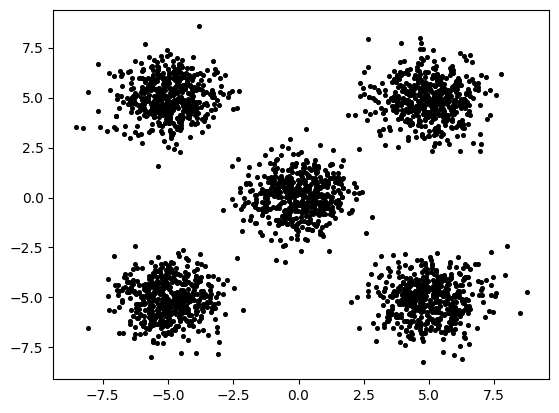

In [ ]:
points_dataset, true_y, number_of_samples = random_dataset_two()
print ("Number of samples are = " + str(number_of_samples))

show_dataset(points_dataset)

# Compute number of clusters using the elbow method.
- Set minimum number of clusters = 1
- Set maximum number of clusters = 16
- Apply K means algorithm using number of clusters within range of minimum and maximum number of clusters.
- Append sum of squared distances of samples to their closest cluster center to wcss array.

### Hints
- [K means clustering algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

In [ ]:
wcss = []

minimum_clusters = 1
maximum_clusters = 16
ragne_of_clusters = range(minimum_clusters, maximum_clusters)

for current_clusters in ragne_of_clusters:
    kmeans_object = KMeans(n_clusters=current_clusters)
    kmeans_object.fit(points_dataset)
    wcss.append(kmeans_object.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

# Draw the graph for visualization.

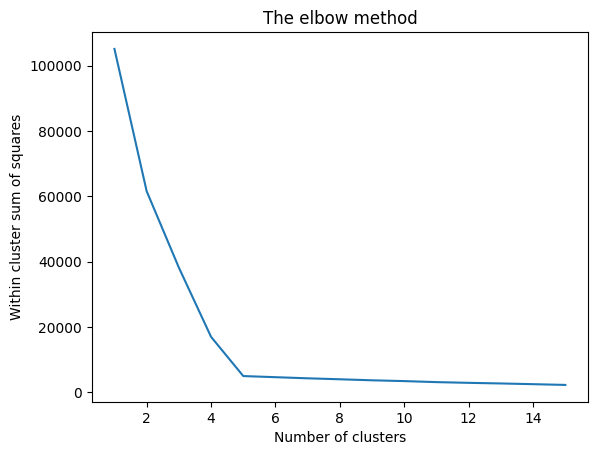

In [ ]:
pyplot.plot(ragne_of_clusters, wcss)
pyplot.title('The elbow method')
pyplot.xlabel('Number of clusters')
pyplot.ylabel('Within cluster sum of squares')
pyplot.show()

# Verify number of clusters computed from the elbow method.
- Apply K means algorithm with number of clusters computed from the elbow method.
- Collect cluster centers and ids computed using K means algorithm.
- Visualize the clustered dataset for verification.

### Hints
- [K means algorithm](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


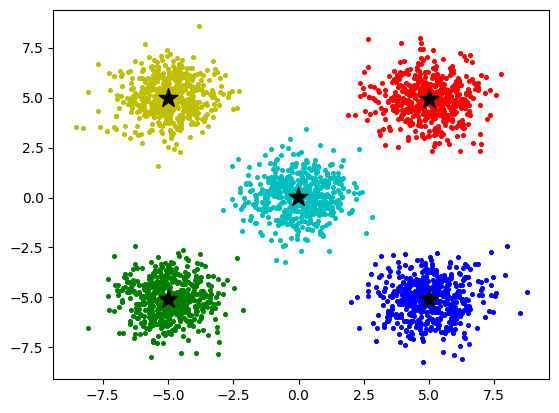

In [ ]:
number_of_clusters = 5
kmeans_object = KMeans(n_clusters=number_of_clusters)
kmeans_object.fit(points_dataset)

cluster_centers = kmeans_object.cluster_centers_
cluster_ids = kmeans_object.labels_

show_clustered_dataset(points_dataset, cluster_ids, cluster_centers, number_of_clusters)